# Conic Sections

Consider a cone's surface given by:  

\begin{equation}\tag{1}
    (z-z_0)^2 = a^2\big((x-x_0)^2 + (y-y_0)^2\big)\quad\quad\text{where }a\ne0
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Example
Assuming $z_0,y_0,x_0=0$ and $a = 5$, via equation (1),  

$$ f(x, y) := z = \pm 5\sqrt{x^2+y^2}$$

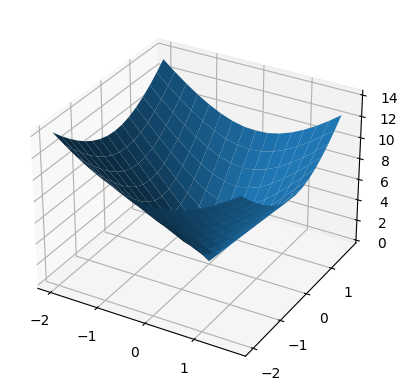

In [2]:
# Create the domain.
x = np.arange(-2, 2, 0.25)
y = np.arange(-2, 2, 0.25)
x, y = np.meshgrid(x, y)

# Define the function.
Z = [5*np.sqrt(x**2 + y**2), -5*np.sqrt(x**2+y**2)]
z_p = Z[0]; z_n = Z[1]

# Create the figure and axes objects.
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# Plot the data.
ax.plot_surface(x, y, z_p)

In [5]:
5*1.75*np.sqrt(2)

12.374368670764582

## Hyperbola
One type of conic section is the hyperbola.  First, let's consider the generic case of the intersection between the plane given by:  

\begin{equation}\tag{2}
    y = b\ne 0
\end{equation}

and the conic surface given by:  

\begin{equation}\tag{3}
    z^2 = (ax)^2 + y^2
\end{equation}

Note, the above equations assumes that $z_0,y_0,x_0=0$.  Now, via equations (2) and (3) and substitution,  

\begin{equation}\tag{4}
    z^2 = a^2x^2 + b^2
\end{equation}

### Unit Hyperbola
Assuming $a,b=1$, we have the unit hyperbola.  

\begin{equation}\tag{5}
    z^2-x^2=1
\end{equation}